In [2]:
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community

import os

In [3]:
os.getcwd()

'/Users/chuyinghe/Documents/Crawler/networkX'

In [4]:
with open('quakers_nodelist.csv', 'r') as nodecsv:
    nodereader = csv.reader(nodecsv)
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    # list of LIST
    nodes = [n for n in nodereader][1:]
    
node_names = [n[0] for n in nodes]

with open('quakers_edgelist.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv)
    # list of TUPLE
    edges = [tuple(e) for e in edgereader][1:]

In [5]:
print(len(node_names))
print(len(edges))

119
174


# 1. Creating the graph

In [19]:
# G = nx.Graph()
G = nx.DiGraph()
# Initialize a Graph object

In [20]:
G.add_nodes_from(node_names)
G.add_edges_from(edges)

In [21]:
G.edges

OutEdgeView([('Joseph Wyeth', 'Thomas Ellwood'), ('Alexander Skene of Newtyle', 'Lilias Skene'), ('James Logan', 'John Bartram'), ('James Logan', 'William Penn'), ('James Logan', 'David Lloyd'), ('Dorcas Erbery', 'James Nayler'), ('William Mucklow', 'George Fox'), ('Thomas Salthouse', 'Margaret Fell'), ('William Dewsbury', 'Edward Burrough'), ('William Dewsbury', 'George Fox'), ('William Dewsbury', 'John Crook'), ('John Audland', 'John Camm'), ('John Audland', 'Francis Howgill'), ('John Audland', 'Edward Pyott'), ('John Audland', 'Charles Marshall'), ('John Audland', 'George Fox'), ('John Audland', 'Anne Camm'), ('William Bradford', 'William Penn'), ('William Bradford', 'Tace Sowle'), ('John Bellers', 'Fettiplace Bellers'), ('Isabel Yeamans', 'William Penn'), ('George Fox the younger', 'Margaret Fell'), ('George Fox', 'Ellis Hookes'), ('George Fox', 'William Mead'), ('George Fox', 'Elizabeth Hooten'), ('George Fox', 'Margaret Fell'), ('George Fox', 'John Crook'), ('George Fox', 'George

In [31]:
G.nodes

NodeView(('Joseph Wyeth', 'Alexander Skene of Newtyle', 'James Logan', 'Dorcas Erbery', 'Lilias Skene', 'William Mucklow', 'Thomas Salthouse', 'William Dewsbury', 'John Audland', 'Richard Claridge', 'William Bradford', 'Fettiplace Bellers', 'John Bellers', 'Isabel Yeamans', 'George Fox the younger', 'George Fox', 'John Stubbs', 'Anne Camm', 'John Camm', 'Thomas Camm', 'Katharine Evans', 'Lydia Lancaster', 'Samuel Clarridge', 'Thomas Lower', 'Gervase Benson', 'Stephen Crisp', 'James Claypoole', 'Thomas Holme', 'John Freame', 'John Swinton', 'William Mead', 'Henry Pickworth', 'John Crook', 'Gilbert Latey', 'Ellis Hookes', 'Joseph Besse', 'James Nayler', 'Elizabeth Hooten', 'George Whitehead', 'John Whitehead', 'William Crouch', 'Benjamin Furly', 'Silvanus Bevan', 'Robert Rich', 'John Whiting', 'Christopher Taylor', 'Thomas Lawson', 'Richard Farnworth', 'William Coddington', 'Thomas Taylor', 'Richard Vickris', 'Robert Barclay', 'Jane Sowle', 'Tace Sowle', 'Leonard Fell', 'Margaret Fell', 

In [22]:
print(nx.info(G))
# Average degree: average number of connections fo each node

Name: 
Type: DiGraph
Number of nodes: 119
Number of edges: 174
Average in degree:   1.4622
Average out degree:   1.4622


# 2. Adding attributes (for nodes & edges)

In [23]:
hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}
# attribute data to be in the form of a Python dictionary

In [24]:
for node in nodes:
    hist_sig_dict[node[0]] = node[1]
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]
# loop through our nodes list and add the appropriate items to each dictionary.

In [25]:
print(nodes[1])

['Alexander Skene of Newtyle', 'local politician and author', 'male', '1621', '1694', '10011149']


In [30]:
hist_sig_dict

{'Joseph Wyeth': 'religious writer',
 'Alexander Skene of Newtyle': 'local politician and author',
 'James Logan': 'colonial official and scholar',
 'Dorcas Erbery': 'Quaker preacher',
 'Lilias Skene': 'Quaker preacher and poet',
 'William Mucklow': 'religious writer',
 'Thomas Salthouse': 'Quaker preacher and writer',
 'William Dewsbury': 'Quaker activist',
 'John Audland': 'Quaker preacher',
 'Richard Claridge': 'Quaker minister and schoolmaster',
 'William Bradford': 'printer',
 'Fettiplace Bellers': 'philosophical writer and playwright',
 'John Bellers': 'political economist and cloth merchant',
 'Isabel Yeamans': 'Quaker preacher',
 'George Fox the younger': 'religious writer',
 'George Fox': ' a founder of the Religious Society of Friends (Quakers)',
 'John Stubbs': 'Quaker minister',
 'Anne Camm': 'Quaker preacher',
 'John Camm': 'Quaker preacher',
 'Thomas Camm': 'Quaker preacher and writer',
 'Katharine Evans': 'Quaker missionary',
 'Lydia Lancaster': 'Quaker minister',
 'Samu

In [27]:
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')

In [28]:
for n in G.nodes():
    print(n, G.nodes[n]['birth_year'])
# print out all the birth years of your nodes
# ⚠️ 所以node本身还是那个ID，并不是一个带所有attribute的list

Joseph Wyeth 1663
Alexander Skene of Newtyle 1621
James Logan 1674
Dorcas Erbery 1656
Lilias Skene 1626
William Mucklow 1630
Thomas Salthouse 1630
William Dewsbury 1621
John Audland 1630
Richard Claridge 1649
William Bradford 1663
Fettiplace Bellers 1687
John Bellers 1654
Isabel Yeamans 1637
George Fox the younger 1551
George Fox 1624
John Stubbs 1618
Anne Camm 1627
John Camm 1605
Thomas Camm 1640
Katharine Evans 1618
Lydia Lancaster 1683
Samuel Clarridge 1631
Thomas Lower 1633
Gervase Benson 1569
Stephen Crisp 1628
James Claypoole 1634
Thomas Holme 1626
John Freame 1665
John Swinton 1620
William Mead 1627
Henry Pickworth 1673
John Crook 1616
Gilbert Latey 1626
Ellis Hookes 1635
Joseph Besse 1683
James Nayler 1618
Elizabeth Hooten 1562
George Whitehead 1637
John Whitehead 1630
William Crouch 1628
Benjamin Furly 1636
Silvanus Bevan 1691
Robert Rich 1607
John Whiting 1656
Christopher Taylor 1614
Thomas Lawson 1630
Richard Farnworth 1630
William Coddington 1601
Thomas Taylor 1617
Richard 

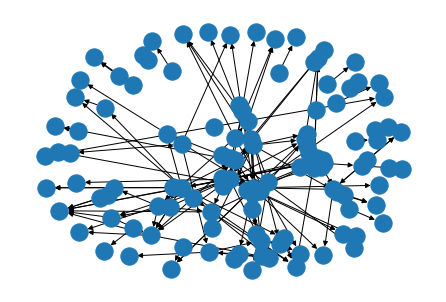

In [29]:
nx.draw(G)

# 3. Metrics in NetworkX

## 3.1. Shape

## 3.2 Centrality

# 4. Advanced NetworkX: Community detection with modularity